# Task #1
______
### Материалы

Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
Matplotlib User Guide: http://matplotlib.org/users/index.html
____

Задача 1. Минимизация гладкой функции

* Рассмотрим все ту же функцию из задания по линейной алгебре: $$f(x) = \sin(x / 5) * \exp(x / 10) + 5 * \exp(-x / 2)$$, но теперь уже на промежутке [1, 30]


* В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
 
 
* Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.


* Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")


* Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.


* Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.


* Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.


* Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [1]:
import numpy as np
import math as m
from scipy import linalg as lin

f = lambda x: m.sin(x / 5.) * m.exp(x / 10.) + 5 * m.exp(-x / 2.)
print f(1), f(30)

3.25221686527 -5.61220877647


In [4]:
from scipy.optimize import minimize
x0 = 3
res = minimize(f, x0)
res.x

array([ 4.13623332])

In [5]:
x0 = 6
res = minimize(f, x0)
res.x

array([ 4.13629005])

### BFGS -- градиентный метод оптимизации

In [27]:
x0 = 2
res_bfgs = minimize(f, x0, method = "BFGS")
res_bfgs.x, round(res_bfgs.fun,2)

(array([ 4.13627619]), 1.75)

In [7]:
round(res_bfgs.x[0], 2)

4.14

In [17]:
res_bfgs

   status: 0
  success: True
     njev: 6
     nfev: 18
 hess_inv: array([[ 1.67838012]])
      fun: -11.898894665981231
        x: array([ 25.88019358])
  message: 'Optimization terminated successfully.'
      jac: array([  2.38418579e-07])
      nit: 5

In [28]:
x0 = 30
res_bfgs = minimize(f, x0, method = "BFGS")
res_bfgs.x
round(res_bfgs.fun, 2)

-11.9

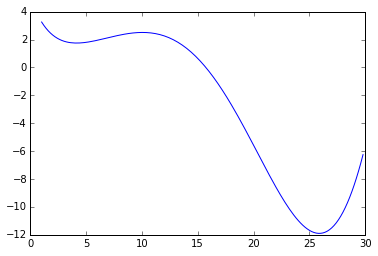

In [14]:
%matplotlib inline
from matplotlib import pylab as plt

x = np.arange(1, 30, 0.2)
f_x = [f(t) for t in x]
plt.plot(x, f_x)
plt.show()

_____

# Differential evolution

In [25]:
from scipy.optimize import differential_evolution

bounds = [(1,30)]
res = differential_evolution(f, bounds)
res.x, round(res.fun,2)


(array([ 25.88019351]), -11.9)

In [16]:
res

    nfev: 81
 success: True
     fun: -11.898894665980338
       x: array([ 25.88019485])
 message: 'Optimization terminated successfully.'
     jac: array([  8.88178420e-07])
     nit: 4

_____

# Non-smooth function

In [18]:
h = lambda x: int(f(x))

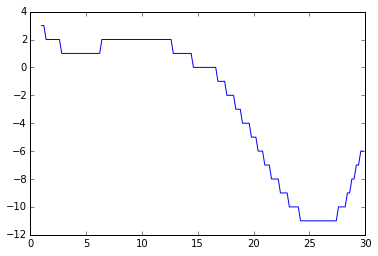

In [20]:
plt.plot(x, [h(t) for t in x])
plt.show()

In [23]:
#BFGS
res3 = minimize(h, 30, method = "BFGS")
res3.x, res3.fun

(array([ 30.]), -5)

In [24]:
#Diff_evo

bounds = [(1,30)]
res4 = differential_evolution(h, bounds)
res4.x, res4.fun

(array([ 25.31110794]), -11.0)